In [34]:
import torch.nn as nn
import torch as tch
import numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Load data into memory using pandas
$ X = \{(x_1, y_i),\; (x_2, y_i),\; ...,\;(x_{11162}, y_i)\} ,\qquad  where\:  X \in \mathbb{R}^{11162} \quad, \quad and \;i = \{1,2\} \; and \:y_i = \{0,1\} $ <br><br>
* The features $x_i$ take diffrents types of values (`strings`, `int`, `binary values`, ....).
* We should rectifie this, in order to transforme this probleme to a binary classification probleme with $\;y_i\in \{0,1\}$.

In [35]:
df = pd.read_csv("../data/bank.csv")
print("DF Shape : ", df.shape)
df.head()

DF Shape :  (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Distributing the Target Values

In [36]:
print("Distribution of Target Values in Dataset :")
df.deposit.value_counts()

Distribution of Target Values in Dataset :


no     5873
yes    5289
Name: deposit, dtype: int64

count the number of occurrences of each unique value in the `deposit` column of a DataFrame `df`.

# Distributing the NA (Null) Values in the Dataset

* Check if we have `na` values within the dataset

In [37]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Check the distinct datatypes within the dataset

In [38]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

# Extract categorical columns from datase

In [39]:
categorical_columns = df.select_dtypes(include="object").columns
print("Categorical cols:",list(categorical_columns))

Categorical cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [40]:
# For each categorical column if values in (Yes/No) convert into a 1/0 flag
for col in categorical_columns:
    if df[col].nunique() == 2:
        df[col] = np.where(df[col] == "yes", 1, 0)

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


# One-Hot Encoding for the Remaining Non-Binary Categorical Variables
* For the remaining cateogrical variables;
* create one-hot encoded version of the dataset

In [42]:
new_df = pd.get_dummies(df)
print(new_df.shape)
new_df.head()

(11162, 49)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,1,0,0,0,0,0,0,1


* Define target and predictors for the model

In [43]:
target = "deposit"
predictors = set(new_df.columns) - set([target])
print("new_df.shape:",new_df.shape)
new_df[predictors].head()

new_df.shape: (11162, 49)


,housing,previous,job_self-employed,day,loan,job_admin.,month_apr,month_jan,month_jun,job_unemployed,...,month_jul,education_primary,job_student,marital_married,education_secondary,duration,month_dec,job_entrepreneur,job_blue-collar,poutcome_success
0,1,0,0,5,0,1,0,0,0,0,...,0,0,0,1,1,1042,0,0,0,0
1,0,0,0,5,0,1,0,0,0,0,...,0,0,0,1,1,1467,0,0,0,0
2,1,0,0,5,0,0,0,0,0,0,...,0,0,0,1,1,1389,0,0,0,0
3,1,0,0,5,0,0,0,0,0,0,...,0,0,0,1,1,579,0,0,0,0
4,0,0,0,5,0,1,0,0,0,0,...,0,0,0,1,0,673,0,0,0,0


# Preparing the Dataset for Training and Validation

* Convert all datatypes within pandas dataframe to Float32
* (Compatibility with PyTorch tensors)

In [44]:
new_df = new_df.astype(np.float32)

# Split dataset into Train/Test [80:20]


In [45]:
X_train,x_test, Y_train,y_test = train_test_split(new_df[predictors],new_df[target],test_size= 0.2)

# Convert Pandas dataframe, first to numpy and then to Torch Tensors

In [46]:
X_train = tch.from_numpy(X_train.values)
x_test = tch.from_numpy(x_test.values)
Y_train = tch.from_numpy(Y_train.values).reshape(-1,1)
y_test = tch.from_numpy(y_test.values).reshape(-1,1)

# Print the dataset size to verify

In [47]:
print("X_train.shape:",X_train.shape)
print("x_test.shape:",x_test.shape)
print("Y_train.shape:",Y_train.shape)
print("y_test.shape:",y_test.shape)

X_train.shape: torch.Size([8929, 48])
x_test.shape: torch.Size([2233, 48])
Y_train.shape: torch.Size([8929, 1])
y_test.shape: torch.Size([2233, 1])


# Starting training model and evaluating its performance : 

* Importing the function that we created in order to train the model and evaluate its performance
* Importing the `Feed Forward Neural Network` class that we created

In [48]:
from NN import NeuralNetwork
from TF import evaluate_model, train_network

* Defining the training variables
* We gonna use the binary cross entropy loss function 

### Binary Cross Entropy Function : 
We have some data consisting of $\;D = \{(x_1, y_1),(x_2, y_2),…(x_n, y_n)\}\;$, where $\:x ∈ R^{n}$ and $\;y ∈ \{0,1\}$ which is the target of interest also known as the criterion variable.

Let’s assume that we have generated a model that predicts the probability of $y$ given $x$. We denote this model by $f (x, θ)$, where $θ$ represents the parameters of the model. The idea behind maximum likelihood is to find a $θ$ that maximizes $P(D| θ)$:


$ -\sum_{i=1}^{n}y_ilog(f(x_i, θ)) + (1-y_i)log(1 - f(x_i, θ)) $    

In [49]:
num_epochs = 500
batch_size = 128
loss_function = nn.BCELoss()

* Hyperparameters

In [50]:
weight_decay = 0.0 #set to 0; no L2 Regularizer; passed into the Optimizer
lambda_L1=0.0 #Set to 0; no L1 reg; manually added in loss (train_network)

* Create a model instance


In [51]:
model = NeuralNetwork()

* Define the optimizer 

In [52]:
adam_optimizer = tch.optim.Adam(model.parameters(), lr= 0.001, weight_decay=weight_decay)

* Train model

In [53]:
adam_loss = train_network(model, adam_optimizer, loss_function ,num_epochs,batch_size, X_train,Y_train,lambda_L1=0.0)

Epoch: 0 - Loss:3.0747


* Evaluate the model


 Model Performance -
Training Accuracy- 0.901
Training Precision- 0.902
Training Recall- 0.887
Training ROCAUC 0.97
Validation Accuracy- 0.798
Validation Precision- 0.791
Validation Recall- 0.787
Validation ROCAUC 0.865




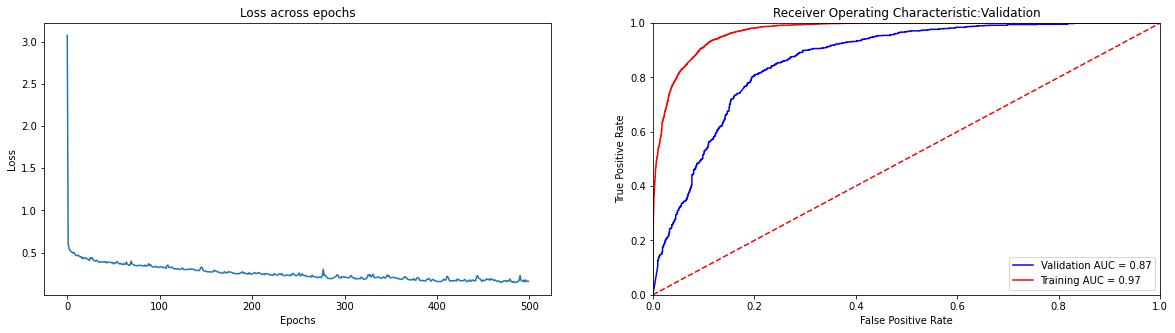

In [54]:
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)

# L1 Regularization

* L1 Regularization

In [55]:
num_epochs = 500
batch_size= 128

#Set to 0; no L2 reg
weight_decay=0.0 

#Enables L1 Regularization
lambda_L1 = 0.0001 

model = NeuralNetwork()

#Binary Crosss Entropy Loss
loss_function = nn.BCELoss()
 
adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001 ,weight_decay=weight_decay)

* Train model


In [56]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,Y_train,lambda_L1=lambda_L1)

Epoch: 0 - Loss:2.8638


* Evaluate model



 Model Performance -
Training Accuracy- 0.871
Training Precision- 0.832
Training Recall- 0.91
Training ROCAUC 0.941
Validation Accuracy- 0.82
Validation Precision- 0.777
Validation Recall- 0.877
Validation ROCAUC 0.885




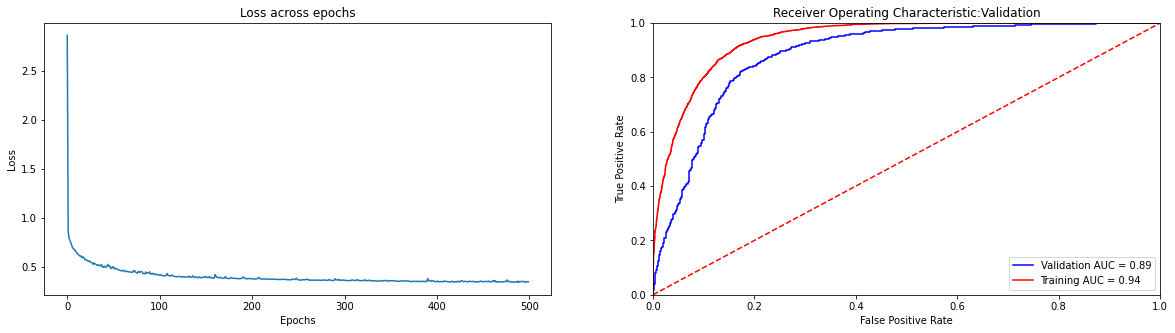

In [57]:
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)

* L2 Reguralization

In [58]:
num_epochs = 500
batch_size= 128
weight_decay=0.001 #Enables L2 Regularization
lambda_L1 = 0.00 #Set to 0; no L1 reg

In [59]:
model = NeuralNetwork()
loss_function = nn.BCELoss() #Binary Crosss Entropy Loss

In [60]:
adam_optimizer = tch.optim.Adam(model.parameters(),lr= 0.001, weight_decay=weight_decay)

* Train model

In [61]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,Y_train,lambda_L1=lambda_L1)

Epoch: 0 - Loss:1.9483



 Model Performance -
Training Accuracy- 0.858
Training Precision- 0.8
Training Recall- 0.933
Training ROCAUC 0.935
Validation Accuracy- 0.804
Validation Precision- 0.745
Validation Recall- 0.9
Validation ROCAUC 0.874




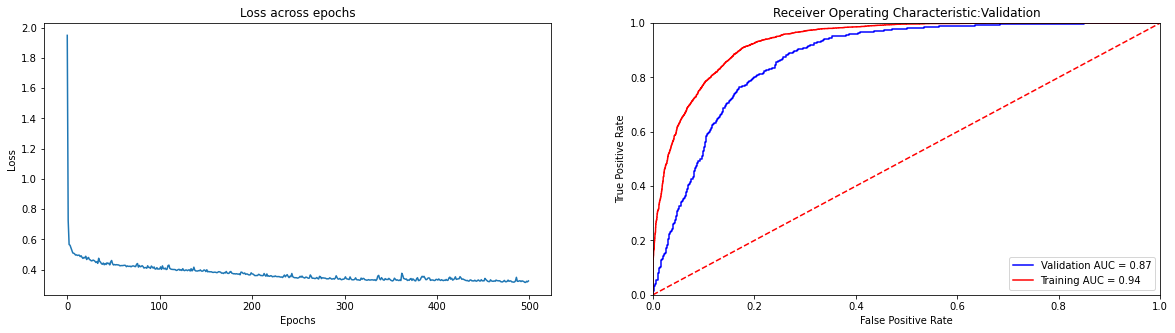

In [62]:
evaluate_model(model,x_test,y_test,X_train,Y_train,adam_loss)

# Dropout Regularization

In [63]:
from NN import NeuralNetworkWithDOL

In [64]:
num_epochs = 500
batch_size= 128
weight_decay=0.0 #Set to 0; no L2 reg
lambda_L1 = 0.0 #Set to 0; no L1 reg

In [65]:
new_model = NeuralNetworkWithDOL()
loss_function = nn.BCELoss() #Binary Crosss Entropy Loss

In [66]:
adam_optimizer = tch.optim.Adam(new_model.parameters(),lr= 0.001,weight_decay=weight_decay)

In [67]:
adam_loss = train_network(model,adam_optimizer,loss_function, num_epochs,batch_size,X_train,Y_train,lambda_L1= lambda_L1)

Epoch: 0 - Loss:0.3270



 Model Performance -
Training Accuracy- 0.529
Training Precision- 0.538
Training Recall- 0.008
Training ROCAUC 0.315
Validation Accuracy- 0.52
Validation Precision- 0.562
Validation Recall- 0.008
Validation ROCAUC 0.323




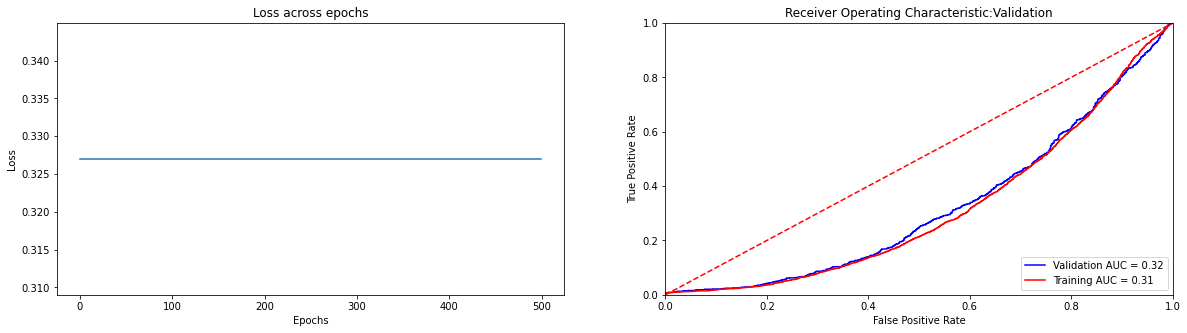

In [68]:
evaluate_model(new_model,x_test,y_test,X_train,Y_train,adam_loss)